# GWA2021: Mathematical and Computational Challenges in the Era of Gravitational Wave Astronomy Tutorials
### Waveforms Tutorial, Sept 21st 2021

g.pratten@bham.ac.uk \
p.schmidt@bham.ac.uk

## Import Packages

In [2]:
import lal, lalsimulation

import matplotlib.pyplot as plt
import numpy as np

## Aesthetic

In [3]:
myblue   = '#0F56B5'
myred    = '#EF4647'
mygrey   = '#666666'
mygreen  = '#2CA02C'
mypurple = '#9467bd'

rc_params = {
    'backend': 'pdf',
    'axes.labelsize': 24,
    'axes.titlesize': 32,
    'font.size': 24,
    'legend.fontsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'font.family': 'serif',
    'font.sans-serif': ['Bitstream Vera Sans'],
    'font.serif': ['Times New Roman'],
    'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}',
    'text.usetex':True,
    'axes.linewidth':1.75,
    'patch.force_edgecolor':True
}
plt.rcParams.update(rc_params);

# Time Domain Waveforms

### Implemented Waveforms

In [6]:
# First, we want to find all TD approximants implemented in LAL
td_waveforms = []
num_approx   = lalsimulation.NumApproximants
for ik in range(num_approx):
    if lalsimulation.SimInspiralImplementedTDApproximants(ik) == 1:
        td_waveforms = np.append(td_waveforms,lalsimulation.SimInspiralGetStringFromApproximant(ik))

In [7]:
print(td_waveforms)

['TaylorT1' 'TaylorT2' 'TaylorT3' 'SpinTaylorT1' 'SpinTaylorT4'
 'SpinTaylorT5' 'PhenSpinTaylor' 'PhenSpinTaylorRD' 'EOBNRv2' 'EOBNRv2HM'
 'TEOBResum_ROM' 'SEOBNRv1' 'SEOBNRv2' 'SEOBNRv2_opt' 'SEOBNRv3'
 'SEOBNRv3_pert' 'SEOBNRv3_opt' 'SEOBNRv3_opt_rk4' 'SEOBNRv4'
 'SEOBNRv4_opt' 'SEOBNRv4P' 'SEOBNRv4PHM' 'SEOBNRv2T' 'SEOBNRv4T'
 'SEOBNRv4_ROM_NRTidalv2' 'SEOBNRv4_ROM_NRTidalv2_NSBH' 'HGimri'
 'IMRPhenomA' 'IMRPhenomB' 'IMRPhenomC' 'IMRPhenomD'
 'IMRPhenomD_NRTidalv2' 'IMRPhenomNSBH' 'IMRPhenomHM' 'IMRPhenomPv2'
 'IMRPhenomPv2_NRTidal' 'IMRPhenomPv2_NRTidalv2' 'TaylorEt' 'TaylorT4'
 'EccentricTD' 'SpinDominatedWf' 'NR_hdf5' 'NRSur7dq2' 'NRSur7dq4'
 'SEOBNRv4HM' 'NRHybSur3dq8' 'IMRPhenomXAS' 'IMRPhenomXHM' 'IMRPhenomPv3'
 'IMRPhenomPv3HM' 'IMRPhenomXP' 'IMRPhenomXPHM' 'TEOBResumS' 'IMRPhenomT'
 'IMRPhenomTHM' 'IMRPhenomTP' 'IMRPhenomTPHM']


### Calling a TD Waveform via ChooseTDWaveform

In [8]:
f_min        = 10.      # Starting frequency
f_ref        = 10.      # Reference frequency
f_max        = 2048.   # Maximum frequency
delta_t      = 1/2048  # Sampling time (e.g. 1/2048 Hz)

longAscNodes = 0 
meanPerAno   = 0
eccentricity = 0

mass_1       = 80 * lal.MSUN_SI # Mass of primary in solar masses
mass_2       = 40  * lal.MSUN_SI # Mass of secondary in solar masses

phase        = 0.0 # Phase at reference frequency

# Dimensionful spin, S_i = m^2_i * \chi_i 
# Frame is defined such that \hat{L} is pointing along \hat{z}
chi_1x      = 0    # Dimensionless spin of primary in x-direction
chi_1y      = 0    # Dimensionless spin of primary in y-direction
chi_1z      = 0    # Dimensionless spin of primary in z-direction
chi_2x      = 0    # Dimensionless spin of secondary in x-direction
chi_2y      = 0    # Dimensionless spin of secondary in y-direction
chi_2z      = 0    # Dimensionless spin of secondary in z-direction
inclination = 0.5  # Inclination of L with respect to J
distance    = 100 * 1e6 * lal.PC_SI # Luminosity distance in m (i.e. 100 Mpc here)
laldict     = None # LAL Dictionary (allows us to pass additional flags and options where possible)

In [9]:
# Generate h+ and hx
h_plus_aligned, h_cross_aligned = lalsimulation.SimInspiralChooseTDWaveform(
    mass_1, mass_2,
    chi_1x, chi_1y, chi_1z,
    chi_2x, chi_2y, chi_2z,
    distance,
    inclination,
    phase,
    longAscNodes,
    meanPerAno,
    eccentricity,
    delta_t,
    f_min,
    f_ref,
    laldict,
    lalsimulation.SEOBNRv4PHM
)
epoch_aligned  = h_plus_aligned.epoch.gpsSeconds + h_plus_aligned.epoch.gpsNanoSeconds/1e9
times_aligned  = np.arange( h_plus_aligned.data.length ) * h_plus_aligned.deltaT + epoch_aligned

# Here h_+ is a LAL data type (Swig Object of type 'REAL8TimeSeries *'), 
# to access the data we need to use h_plus_aligned.data.data

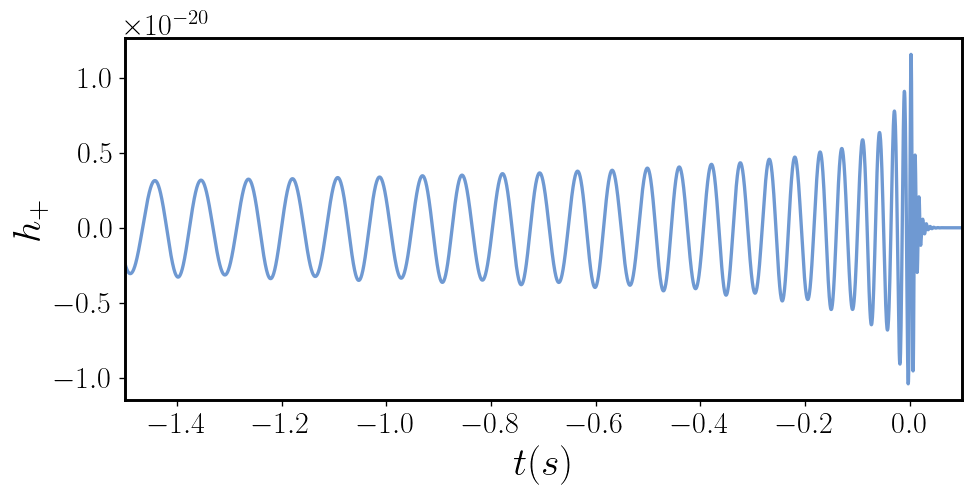

In [10]:
# Waveform is aligned such that peak occurs at t=0
plt.figure(dpi=120,figsize=(9,4))
plt.plot(times_aligned,h_plus_aligned.data.data,color=myblue,alpha=0.6,linewidth=2)
plt.xlim(-1.5,0.1);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{+}$');

In [11]:
# Let's generate a precessing waveform (spins misaligned with orbital angular momenta)
f_min        = 10.      # Starting frequency
f_ref        = 10.      # Reference frequency
f_max        = 2048.   # Maximum frequency
delta_t      = 1/2048  # Sampling time (e.g. 1/2048 Hz)

longAscNodes = 0 
meanPerAno   = 0
eccentricity = 0

mass_1       = 80 * lal.MSUN_SI # Mass of primary in solar masses
mass_2       = 40  * lal.MSUN_SI # Mass of secondary in solar masses

phase        = 0.0 # Phase at reference frequency

# Dimensionful spin, S_i = m^2_i * \chi_i 
# Frame is defined such that \hat{L} is pointing along \hat{z}
chi_1x      = 0.8  # Dimensionless spin of primary in x-direction
chi_1y      = 0    # Dimensionless spin of primary in y-direction
chi_1z      = 0    # Dimensionless spin of primary in z-direction
chi_2x      = 0    # Dimensionless spin of secondary in x-direction
chi_2y      = 0    # Dimensionless spin of secondary in y-direction
chi_2z      = 0    # Dimensionless spin of secondary in z-direction
inclination = 0.5  # Inclination of L with respect to J
distance    = 100 * 1e6 * lal.PC_SI # Luminosity distance in m (i.e. 100 Mpc here)
laldict     = None # LAL Dictionary (allows us to pass additional flags and options where possible)

In [12]:
# Generate h+ and hx
h_plus_precessing, h_cross_precessing = lalsimulation.SimInspiralChooseTDWaveform(
    mass_1, mass_2,
    chi_1x, chi_1y, chi_1z,
    chi_2x, chi_2y, chi_2z,
    distance,
    inclination,
    phase,
    longAscNodes,
    meanPerAno,
    eccentricity,
    delta_t,
    f_min,
    f_ref,
    laldict,
    lalsimulation.SEOBNRv4PHM
)
epoch_precessing  = h_plus_precessing.epoch.gpsSeconds + h_plus_precessing.epoch.gpsNanoSeconds/1e9
times_precessing  = np.arange( h_plus_precessing.data.length ) * h_plus_precessing.deltaT + epoch_precessing

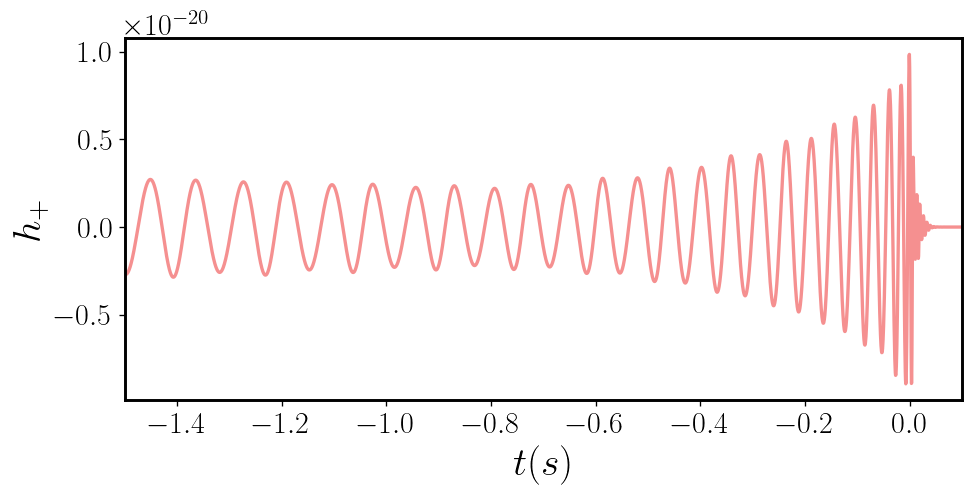

In [13]:
# Waveform is aligned such that peak occurs at t=0
plt.figure(dpi=120,figsize=(9,4))
plt.plot(times_precessing,h_plus_precessing.data.data,color=myred,alpha=0.6,linewidth=2)
plt.xlim(-1.5,0.1);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{+}$');

### Specifying Waveform Modes To Use

In [14]:
# Let's generate a precessing waveform (spins misaligned with orbital angular momenta)
f_min        = 10.      # Starting frequency
f_ref        = 10.      # Reference frequency
f_max        = 2048.   # Maximum frequency
delta_t      = 1/2048  # Sampling time (e.g. 1/2048 Hz)

longAscNodes = 0 
meanPerAno   = 0
eccentricity = 0

mass_1       = 80 * lal.MSUN_SI # Mass of primary in solar masses
mass_2       = 40  * lal.MSUN_SI # Mass of secondary in solar masses

phase        = 0.0 # Phase at reference frequency

# Dimensionful spin, S_i = m^2_i * \chi_i 
# Frame is defined such that \hat{L} is pointing along \hat{z}
chi_1x      = 0.8  # Dimensionless spin of primary in x-direction
chi_1y      = 0    # Dimensionless spin of primary in y-direction
chi_1z      = 0    # Dimensionless spin of primary in z-direction
chi_2x      = 0    # Dimensionless spin of secondary in x-direction
chi_2y      = 0    # Dimensionless spin of secondary in y-direction
chi_2z      = 0    # Dimensionless spin of secondary in z-direction
inclination = 0.5  # Inclination of L with respect to J
distance    = 100 * 1e6 * lal.PC_SI # Luminosity distance in m (i.e. 100 Mpc here)
laldict     = None # LAL Dictionary (allows us to pass additional flags and options where possible)

In [17]:
# By default *all* available modes are used to generate a waveform
# However, we can specify a subset of modes to use. 
# Convention is that mode_array determines the waveform modes in the co-precessing frame.

laldict   = lal.CreateDict()

# For SEOBNRv4PHM, mode array should specify the (l,|m|) as the code will automatically return +- m modes
modes     = [[2,2],[2,1]]

# Initialize a mode array
modearray = lalsimulation.SimInspiralCreateModeArray()

# Populate mode array
for mode in modes:
    lalsimulation.SimInspiralModeArrayActivateMode(modearray, mode[0], mode[1])
    
# Add mode array to lal dictionary
lalsimulation.SimInspiralWaveformParamsInsertModeArray(laldict, modearray)

# Generate h+ and hx
h_plus_precessing_l2, h_cross_precessing_l2 = lalsimulation.SimInspiralChooseTDWaveform(
    mass_1, mass_2,
    chi_1x, chi_1y, chi_1z,
    chi_2x, chi_2y, chi_2z,
    distance,
    inclination,
    phase,
    longAscNodes,
    meanPerAno,
    eccentricity,
    delta_t,
    f_min,
    f_ref,
    laldict,
    lalsimulation.SEOBNRv4PHM
)
epoch_precessing_l2  = h_plus_precessing_l2.epoch.gpsSeconds + h_plus_precessing_l2.epoch.gpsNanoSeconds/1e9
times_precessing_l2  = np.arange( h_plus_precessing_l2.data.length ) * h_plus_precessing_l2.deltaT + epoch_precessing_l2


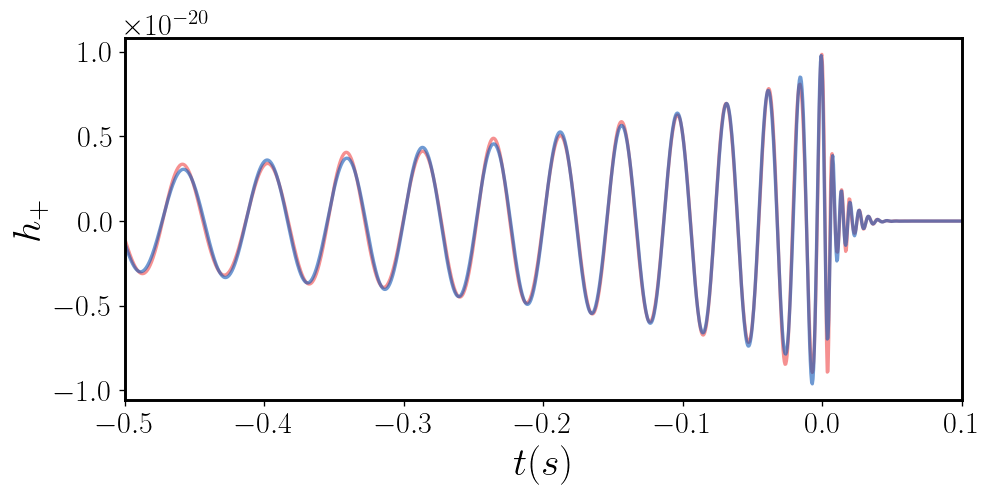

In [18]:
# Let's compare precessing waveform (all default modes) against waveform with only l=2 modes
plt.figure(dpi=120,figsize=(9,4))
plt.plot(times_precessing,h_plus_precessing.data.data,color=myred,alpha=0.6,linewidth=2)
plt.plot(times_precessing_l2,h_plus_precessing_l2.data.data,color=myblue,alpha=0.6,linewidth=2)
plt.xlim(-0.5,0.1);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{+}$');

# Only a mild difference! Waveform dominated by l=2 modes but higher modes will induce subdominant corrections.
# Depends on: 
#   - intrinsic parameters: asymmetry in binary (mass, spin) excites higher multipoles
#   - extrinsic parameters: geometric factor in spin-weighted spherical harmonic weights the 
#                           contribution of higher multipoles to strain

### ChooseTDModes

In [19]:
laldict = lal.CreateDict()
l_max   = 5
# Generate all modes up to l=5
modes   = [(l,m) for l in range(2,l_max+1) for m in range(-l,l+1)]
hlm     = lalsimulation.SimInspiralChooseTDModes(phase,
                                             delta_t,
                                             mass_1, mass_2,
                                             chi_1x, chi_1y, chi_1z,
                                             chi_2x, chi_2y, chi_2z,
                                             f_min,f_min,
                                             distance,
                                             laldict,
                                             l_max,
                                             lalsimulation.SEOBNRv4PHM
                                            )


In [20]:
h_plus, h_cross = lalsimulation.SimInspiralChooseTDWaveform(
    mass_1, mass_2,
    chi_1x, chi_1y, chi_1z,
    chi_2x, chi_2y, chi_2z,
    distance,
    inclination,
    phase,
    longAscNodes,
    meanPerAno,
    eccentricity,
    delta_t,
    f_min,
    f_ref,
    laldict,
    lalsimulation.SEOBNRv4PHM
)
epoch = h_plus.epoch.gpsSeconds + h_plus.epoch.gpsNanoSeconds/1e9

In [21]:
times_modes   = lalsimulation.SphHarmTimeSeriesGetMode(hlm, 2, 2).deltaT * np.arange(len(lalsimulation.SphHarmTimeSeriesGetMode(hlm, 2, 2).data.data)) + epoch
hlms          = {}
 
h_plus_recon  = 0.0
h_cross_recon = 0.0

for lm in modes:
    hlms[lm]       = lalsimulation.SphHarmTimeSeriesGetMode(hlm, lm[0], lm[1]).data.data
    sYlm           = lal.SpinWeightedSphericalHarmonic(inclination, lal.PI / 2. - phase, -2, lm[0], lm[1])
    h_plus_recon  += np.real(sYlm*hlms[lm])
    h_cross_recon += -np.imag(sYlm*hlms[lm])

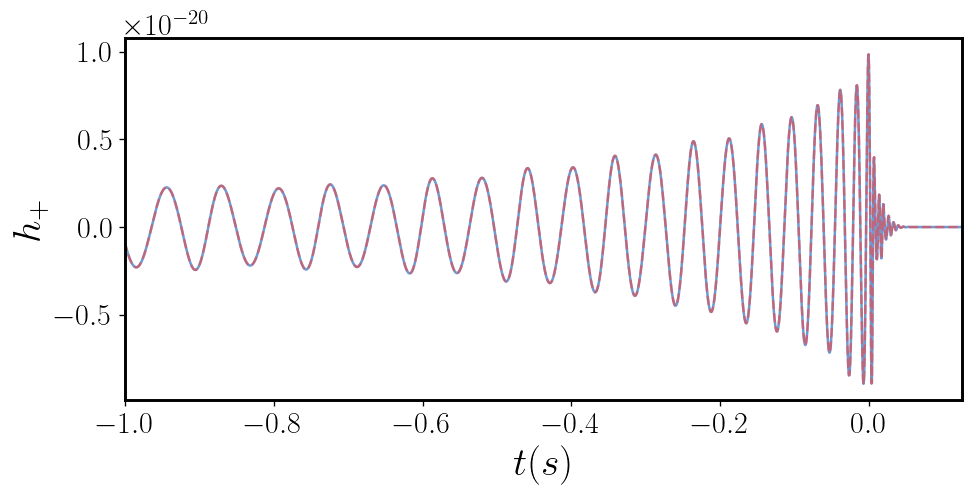

In [22]:
plt.figure(dpi=120,figsize=(9,4))
plt.plot(times_modes,h_plus_recon,color=myblue,alpha=0.6)
plt.plot(times_modes,h_plus.data.data,color=myred,alpha=0.6,linestyle='--');
plt.xlim(-1.0,0.125);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{+}$');

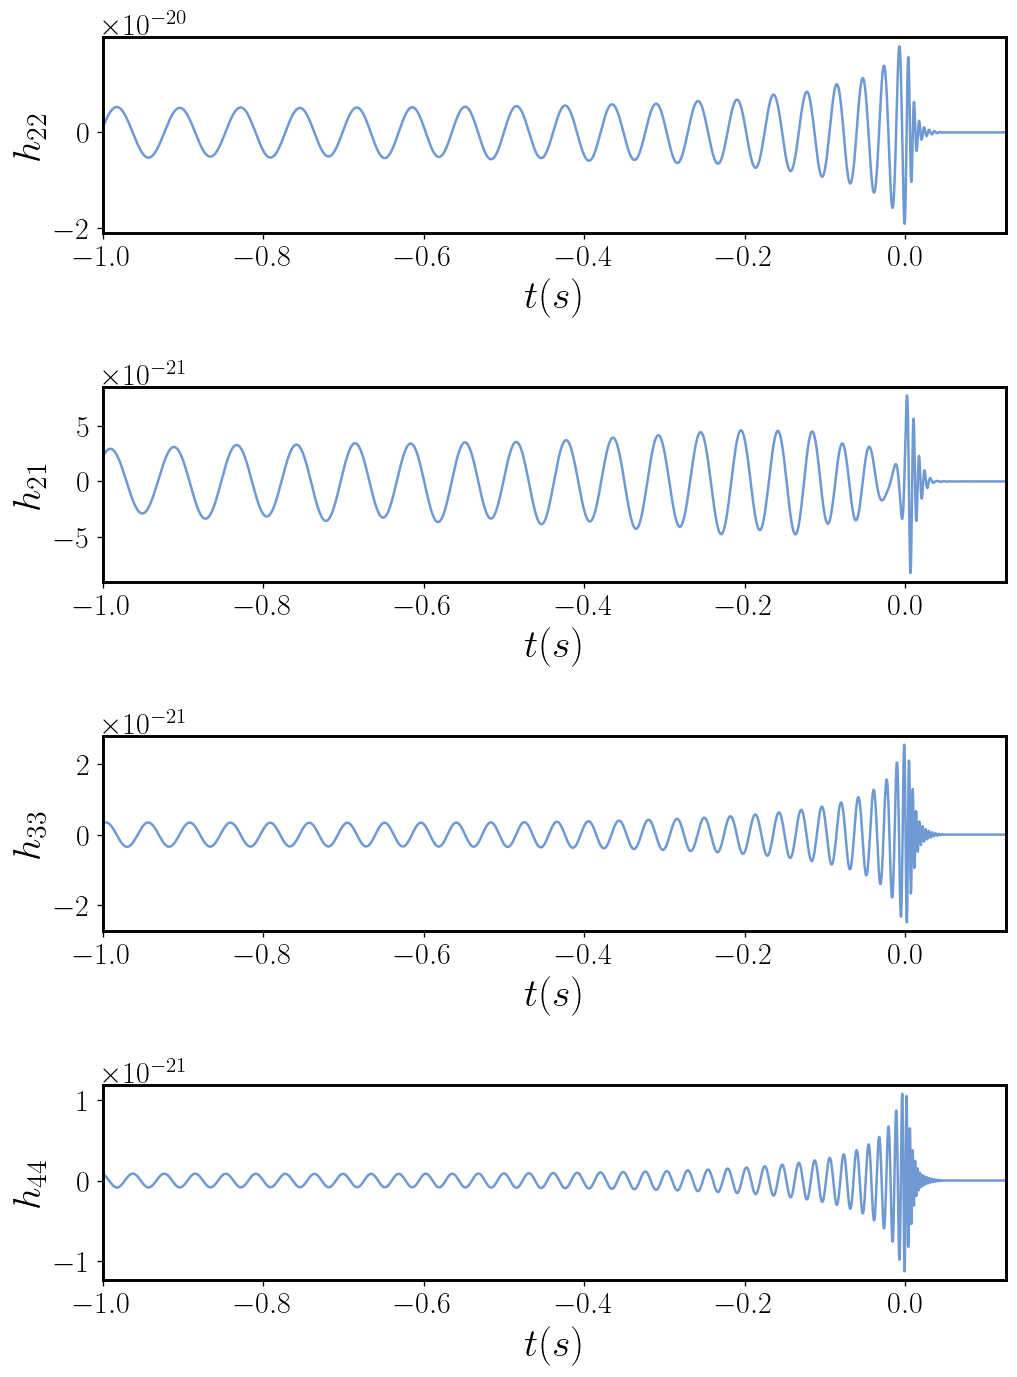

In [23]:
plt.figure(dpi=120,figsize=(9,12))
plt.subplot(411);
plt.plot(times_modes,np.real(hlms[(2,2)]),color=myblue,alpha=0.6);
plt.xlim(-1.0,0.125);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{22}$');
plt.subplot(412);
plt.plot(times_modes,np.real(hlms[(2,1)]),color=myblue,alpha=0.6);
plt.xlim(-1.0,0.125);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{21}$');
plt.subplot(413);
plt.plot(times_modes,np.real(hlms[(3,3)]),color=myblue,alpha=0.6);
plt.xlim(-1.0,0.125);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{33}$');
plt.subplot(414);
plt.plot(times_modes,np.real(hlms[(4,4)]),color=myblue,alpha=0.6);
plt.xlim(-1.0,0.125);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{44}$');
plt.tight_layout();

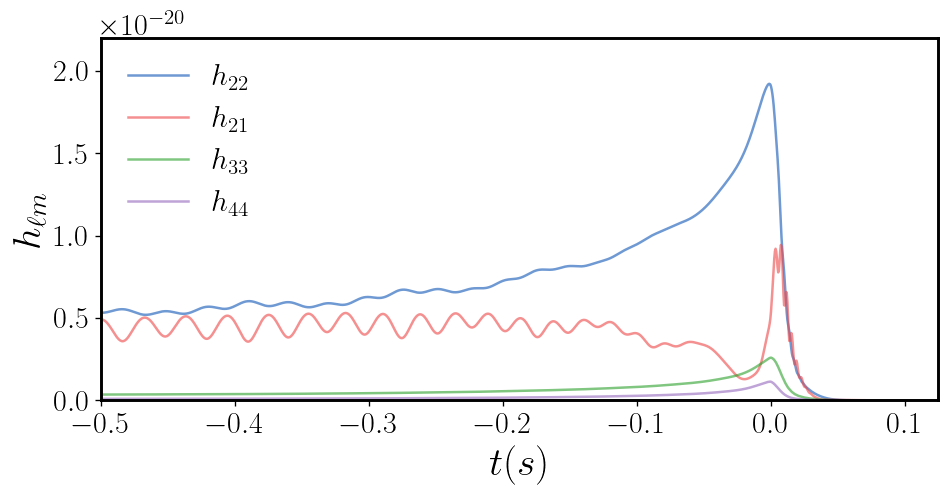

In [24]:
plt.figure(dpi=120,figsize=(9,4))
plt.plot(times_modes,np.abs(hlms[(2,2)]),color=myblue,alpha=0.6,label=r'$h_{22}$')
plt.plot(times_modes,np.abs(hlms[(2,1)]),color=myred,alpha=0.6,label=r'$h_{21}$')
plt.plot(times_modes,np.abs(hlms[(3,3)]),color=mygreen,alpha=0.6,label=r'$h_{33}$')
plt.plot(times_modes,np.abs(hlms[(4,4)]),color=mypurple,alpha=0.6,label=r'$h_{44}$')
plt.xlim(-0.5,0.125);
plt.ylim(0,2.2e-20);
plt.legend(loc='upper left',frameon=False);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{\ell m}$');

# Frequency Domain Waveforms

In [26]:
fd_waveforms = []
num_approx   = lalsimulation.NumApproximants
for ik in range(num_approx):
    if lalsimulation.SimInspiralImplementedFDApproximants(ik) == 1:
        fd_waveforms = np.append(fd_waveforms,lalsimulation.SimInspiralGetStringFromApproximant(ik))

In [27]:
print(fd_waveforms)

['EccentricFD' 'TaylorF2' 'TaylorF2Ecc' 'TaylorF2NLTides'
 'TaylorF2RedSpin' 'TaylorF2RedSpinTidal' 'SpinTaylorF2' 'EOBNRv2_ROM'
 'EOBNRv2HM_ROM' 'SEOBNRv1_ROM_EffectiveSpin' 'SEOBNRv1_ROM_DoubleSpin'
 'SEOBNRv2_ROM_EffectiveSpin' 'SEOBNRv2_ROM_DoubleSpin'
 'SEOBNRv2_ROM_DoubleSpin_HI' 'Lackey_Tidal_2013_SEOBNRv2_ROM'
 'SEOBNRv4_ROM' 'SEOBNRv4HM_ROM' 'SEOBNRv4_ROM_NRTidal'
 'SEOBNRv4_ROM_NRTidalv2' 'SEOBNRv4_ROM_NRTidalv2_NSBH'
 'SEOBNRv4T_surrogate' 'IMRPhenomA' 'IMRPhenomB' 'IMRPhenomC' 'IMRPhenomD'
 'IMRPhenomD_NRTidal' 'IMRPhenomD_NRTidalv2' 'IMRPhenomNSBH' 'IMRPhenomHM'
 'IMRPhenomP' 'IMRPhenomPv2' 'IMRPhenomPv2_NRTidal'
 'IMRPhenomPv2_NRTidalv2' 'SpinTaylorT4Fourier' 'SpinTaylorT5Fourier'
 'NRSur4d2s' 'IMRPhenomXAS' 'IMRPhenomXHM' 'IMRPhenomPv3' 'IMRPhenomPv3HM'
 'IMRPhenomXP' 'IMRPhenomXPHM']


In [28]:
# Let's generate an aligned spin waveform 
f_min        = 10.      # Starting frequency
f_ref        = 10.      # Reference frequency
f_max        = 2048.    # Maximum frequency
delta_f      = 1/8      # Sampling frequency 

longAscNodes = 0 
meanPerAno   = 0
eccentricity = 0

mass_1       = 80 * lal.MSUN_SI # Mass of primary in solar masses
mass_2       = 40  * lal.MSUN_SI # Mass of secondary in solar masses

phase        = 0.0 # Phase at reference frequency

# Dimensionful spin, S_i = m^2_i * \chi_i 
# Frame is defined such that \hat{L} is pointing along \hat{z}
chi_1x      = 0.0  # Dimensionless spin of primary in x-direction
chi_1y      = 0    # Dimensionless spin of primary in y-direction
chi_1z      = 0    # Dimensionless spin of primary in z-direction
chi_2x      = 0    # Dimensionless spin of secondary in x-direction
chi_2y      = 0    # Dimensionless spin of secondary in y-direction
chi_2z      = 0    # Dimensionless spin of secondary in z-direction
inclination = 0.5  # Inclination of L with respect to J
distance    = 100 * 1e6 * lal.PC_SI # Luminosity distance in m (i.e. 100 Mpc here)
laldict     = None # LAL Dictionary (allows us to pass additional flags and options where possible)

In [29]:
# Generate h+ and hx
hf_plus_aligned, hf_cross_aligned = lalsimulation.SimInspiralChooseFDWaveform(
    mass_1, mass_2,
    chi_1x, chi_1y, chi_1z,
    chi_2x, chi_2y, chi_2z,
    distance,
    inclination,
    phase,
    longAscNodes,
    meanPerAno,
    eccentricity,
    delta_f,
    f_min,
    f_max,
    f_ref,
    laldict,
    lalsimulation.IMRPhenomXAS
)
freqs_aligned  = np.arange(0,len(hf_plus_aligned.data.data))*delta_f + delta_f

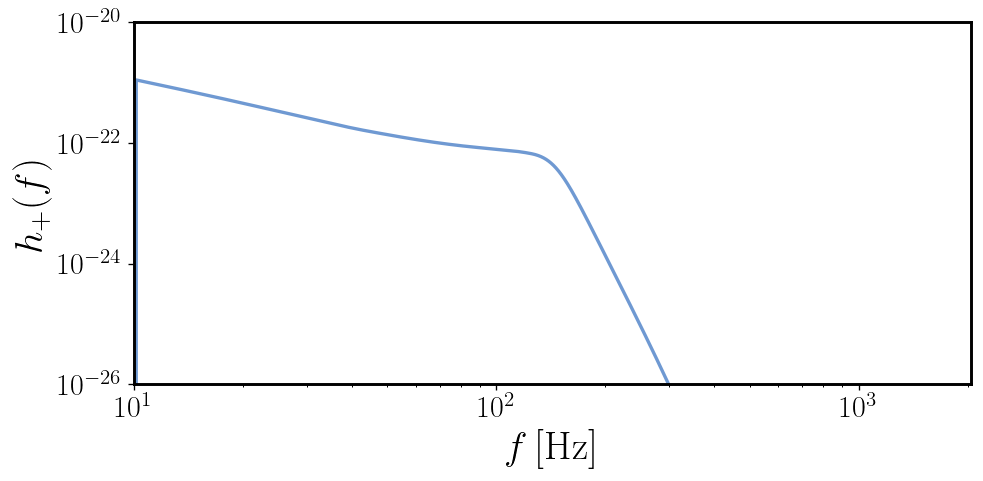

In [30]:
plt.figure(dpi=120,figsize=(9,4))
plt.loglog(freqs_aligned,np.abs(hf_plus_aligned.data.data),color=myblue,alpha=0.6,linewidth=2);
plt.xlim(f_min,f_max);
plt.ylim(1e-26,1e-20);
plt.xlabel(r'$f \left[ \rm{Hz} \right]$');
plt.ylabel(r'$h_{+} (f)$');

In [31]:
# Generate h+ and hx but with higher modes
hf_plus_aligned_hm, hf_cross_aligned_hm = lalsimulation.SimInspiralChooseFDWaveform(
    mass_1, mass_2,
    chi_1x, chi_1y, chi_1z,
    chi_2x, chi_2y, chi_2z,
    distance,
    inclination,
    phase,
    longAscNodes,
    meanPerAno,
    eccentricity,
    delta_f,
    f_min,
    f_max,
    f_ref,
    laldict,
    lalsimulation.IMRPhenomXHM
)
freqs_aligned_hm  = np.arange(0,len(hf_plus_aligned_hm.data.data))*delta_f + delta_f

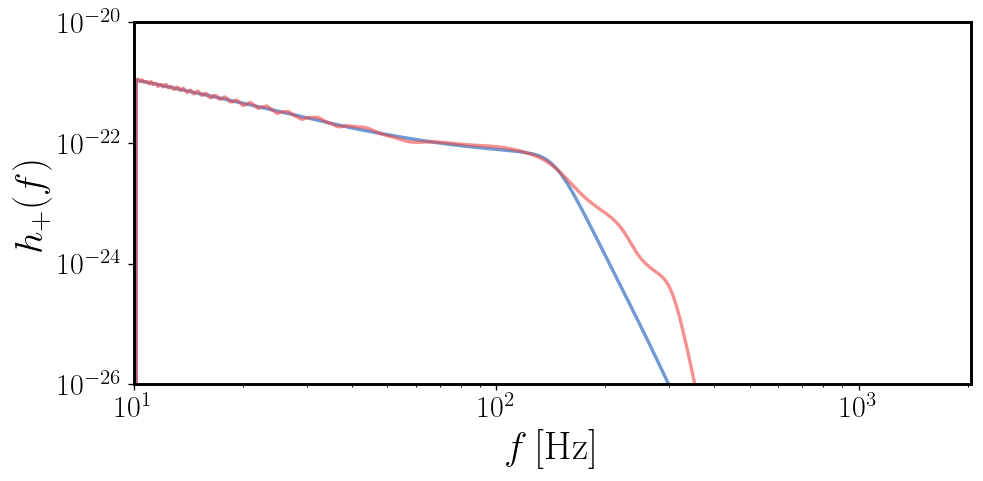

In [32]:
plt.figure(dpi=120,figsize=(9,4))
plt.loglog(freqs_aligned,np.abs(hf_plus_aligned.data.data),color=myblue,alpha=0.6,linewidth=2);
plt.loglog(freqs_aligned,np.abs(hf_plus_aligned_hm.data.data),color=myred,alpha=0.6,linewidth=2);
plt.xlim(f_min,f_max);
plt.ylim(1e-26,1e-20);
plt.xlabel(r'$f \left[ \rm{Hz} \right]$');
plt.ylabel(r'$h_{+} (f)$');

In [33]:
# Now again but with precession!
f_min        = 10.      # Starting frequency
f_ref        = 10.      # Reference frequency
f_max        = 2048.    # Maximum frequency
delta_f      = 1/8      # Sampling frequency 

longAscNodes = 0 
meanPerAno   = 0
eccentricity = 0

mass_1       = 80 * lal.MSUN_SI # Mass of primary in solar masses
mass_2       = 40  * lal.MSUN_SI # Mass of secondary in solar masses

phase        = 0.0 # Phase at reference frequency

# Dimensionful spin, S_i = m^2_i * \chi_i 
# Frame is defined such that \hat{L} is pointing along \hat{z}
chi_1x      = 0.5  # Dimensionless spin of primary in x-direction
chi_1y      = 0    # Dimensionless spin of primary in y-direction
chi_1z      = 0    # Dimensionless spin of primary in z-direction
chi_2x      = 0    # Dimensionless spin of secondary in x-direction
chi_2y      = 0    # Dimensionless spin of secondary in y-direction
chi_2z      = 0    # Dimensionless spin of secondary in z-direction
inclination = 0.5  # Inclination of L with respect to J
distance    = 100 * 1e6 * lal.PC_SI # Luminosity distance in m (i.e. 100 Mpc here)
laldict     = None # LAL Dictionary (allows us to pass additional flags and options where possible)

In [34]:
# Generate h+ and hx but with precession + higher modes
hf_plus_precessing_hm, hf_cross_precessing_hm = lalsimulation.SimInspiralChooseFDWaveform(
    mass_1, mass_2,
    chi_1x, chi_1y, chi_1z,
    chi_2x, chi_2y, chi_2z,
    distance,
    inclination,
    phase,
    longAscNodes,
    meanPerAno,
    eccentricity,
    delta_f,
    f_min,
    f_max,
    f_ref,
    laldict,
    lalsimulation.IMRPhenomXPHM
)
freqs_precessing_hm  = np.arange(0,len(hf_plus_precessing_hm.data.data))*delta_f + delta_f

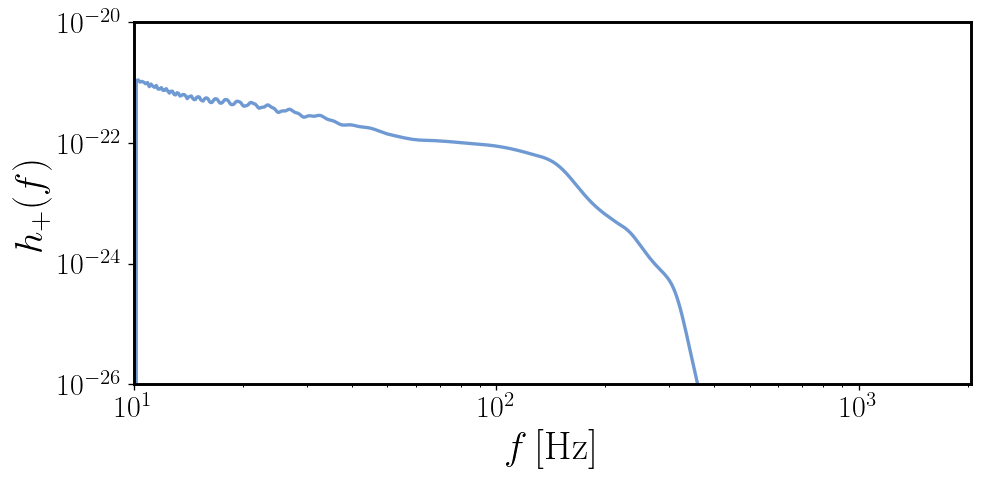

In [35]:
plt.figure(dpi=120,figsize=(9,4))
plt.loglog(freqs_precessing_hm,np.abs(hf_plus_precessing_hm.data.data),color=myblue,alpha=0.6,linewidth=2);
plt.xlim(f_min,f_max);
plt.ylim(1e-26,1e-20);
plt.xlabel(r'$f \left[ \rm{Hz} \right]$');
plt.ylabel(r'$h_{+} (f)$');

# Using PyCBC

### Project Waveform Onto Detectors

In [36]:
from pycbc import waveform
from pycbc import detector

In [37]:
H1 = detector.Detector(detector_name='H1')
L1 = detector.Detector(detector_name='L1')
V1 = detector.Detector(detector_name='V1')

In [38]:
# Let's generate a precessing waveform (spins misaligned with orbital angular momenta)
f_min        = 10.      # Starting frequency
f_ref        = 10.      # Reference frequency
f_max        = 2048.   # Maximum frequency
delta_t      = 1/2048  # Sampling time (e.g. 1/2048 Hz)

longAscNodes = 0 
meanPerAno   = 0
eccentricity = 0

mass_1       = 80 * lal.MSUN_SI # Mass of primary in solar masses
mass_2       = 40  * lal.MSUN_SI # Mass of secondary in solar masses

phase        = 0.0 # Phase at reference frequency

# Dimensionful spin, S_i = m^2_i * \chi_i 
# Frame is defined such that \hat{L} is pointing along \hat{z}
chi_1x      = 0.8  # Dimensionless spin of primary in x-direction
chi_1y      = 0    # Dimensionless spin of primary in y-direction
chi_1z      = 0    # Dimensionless spin of primary in z-direction
chi_2x      = 0    # Dimensionless spin of secondary in x-direction
chi_2y      = 0    # Dimensionless spin of secondary in y-direction
chi_2z      = 0    # Dimensionless spin of secondary in z-direction
inclination = 0.5  # Inclination of L with respect to J
distance    = 100 * 1e6 * lal.PC_SI # Luminosity distance in m (i.e. 100 Mpc here)
laldict     = None # LAL Dictionary (allows us to pass additional flags and options where possible)

In [39]:
params = {
    'approximant':'SEOBNRv4PHM',
    'mass1':80, # Mass of primary in solar masses
    'mass2':40, # Mass of primary in solar masses
    'spin1x' : 0.8,
    'spin1y' : 0.0,
    'spin1z' : 0.0,
    'spin2z' : 0.0,
    'spin2y' : 0.0,
    'spin2z' : 0.0,
    'inclination':0.5,
    'delta_t':1./2048,
    'f_lower':10.,
    'f_start':10.,
    'f_ref':10.0,
}

In [40]:
hp, hc = waveform.get_td_waveform(**params)

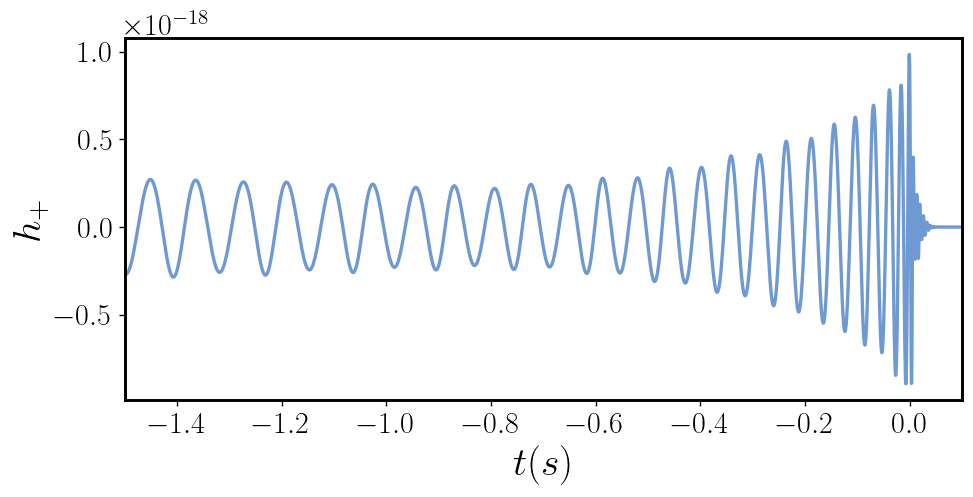

In [41]:
# Waveform is aligned such that peak occurs at t=0
plt.figure(dpi=120,figsize=(9,4))
plt.plot(hp.sample_times,hp.data.data,color=myblue,alpha=0.6,linewidth=2)
plt.xlim(-1.5,0.1);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{+}$');

In [42]:
H1_proj = H1.project_wave(hp, hc, ra=0.5, dec=0.2, polarization=0.25)
L1_proj = L1.project_wave(hp, hc, ra=0.5, dec=0.2, polarization=0.25)
V1_proj = V1.project_wave(hp, hc, ra=0.5, dec=0.2, polarization=0.25)

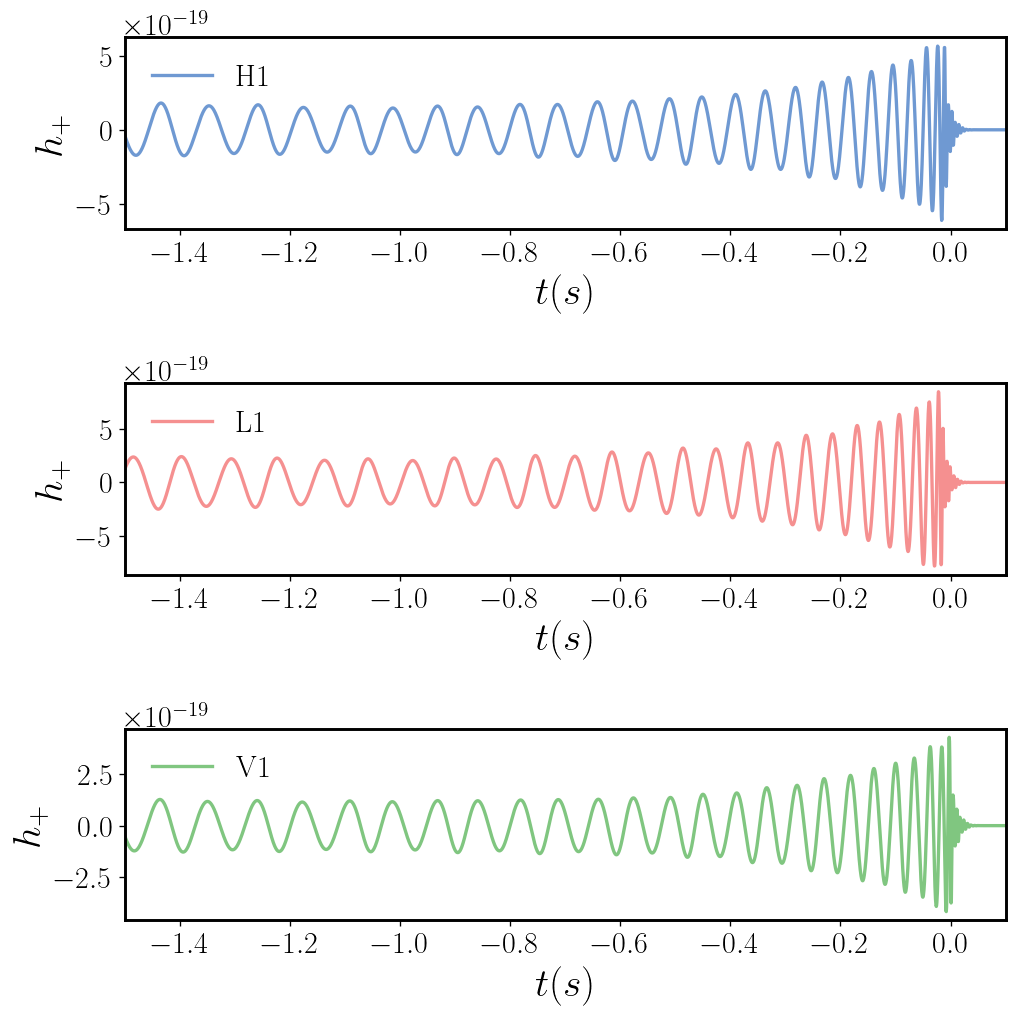

In [43]:
# Waveform is aligned such that peak occurs at t=0
plt.figure(dpi=120,figsize=(9,9))
plt.subplot(311)
plt.plot(H1_proj.sample_times,H1_proj.data.data,color=myblue,alpha=0.6,linewidth=2,label='H1')
plt.xlim(-1.5,0.1);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{+}$');
plt.legend(loc='upper left',frameon=False)
plt.subplot(312)
plt.plot(L1_proj.sample_times,L1_proj.data.data,color=myred,alpha=0.6,linewidth=2,label='L1')
plt.xlim(-1.5,0.1);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{+}$');
plt.legend(loc='upper left',frameon=False)
plt.subplot(313)
plt.plot(V1_proj.sample_times,V1_proj.data.data,color=mygreen,alpha=0.6,linewidth=2,label='V1')
plt.xlim(-1.5,0.1);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{+}$');
plt.legend(loc='upper left',frameon=False)
plt.tight_layout();

# Mismatch Between Waveform Models?

In [44]:
from pycbc import psd
from pycbc.filter import match, matched_filter
import pycbc.vetoes

In [45]:
help(waveform.get_td_waveform)

Help on function get_td_waveform in module pycbc.waveform.waveform:

get_td_waveform(template=None, **kwargs)
    Return the plus and cross polarizations of a time domain waveform.
    
    Parameters
    ----------
    template: object
        An object that has attached properties. This can be used to subsitute
        for keyword arguments. A common example would be a row in an xml table.
    mass1 : {None, <class 'float}
        The mass of the first component object in the binary (in solar masses).
    mass2 : {None, <class 'float}
        The mass of the second component object in the binary (in solar masses).
    spin1x : {0.0, <class 'float}
        The x component of the first binary component's dimensionless spin.
    spin1y : {0.0, <class 'float}
        The y component of the first binary component's dimensionless spin.
    spin1z : {0.0, <class 'float}
        The z component of the first binary component's dimensionless spin.
    spin2x : {0.0, <class 'float}
        The 

In [46]:
f_lower = 5.0
binary = {
    'mass1'  : 50.0,
    'mass2'  : 10.0,
    'spin1x' : 0.0,
    'spin1y' : 0.0,
    'spin1z' : 0.5,
    'spin2x' : 0.0,
    'spin2y' : 0.0,
    'spin2z' : -0.5,
    'inclination' : 0.0,
    'distance'    : 100.0,
    'f_lower'     : f_lower,
    'f_ref'       : f_lower,
    'delta_t'     : 1.0/4096,
}

In [47]:
# waveform a
hap, hac      = waveform.get_td_waveform(approximant='SEOBNRv4', **binary)

# waveform b
hbp, hbc      = waveform.get_td_waveform(approximant='IMRPhenomXAS', **binary)

 # ensure that both signal and template have the same length
tlen = max(len(hap), len(hbp))
# resize waveform a
hap.resize(tlen)
hbp.resize(tlen)
# resize waveform b
hac.resize(tlen)
hbc.resize(tlen)

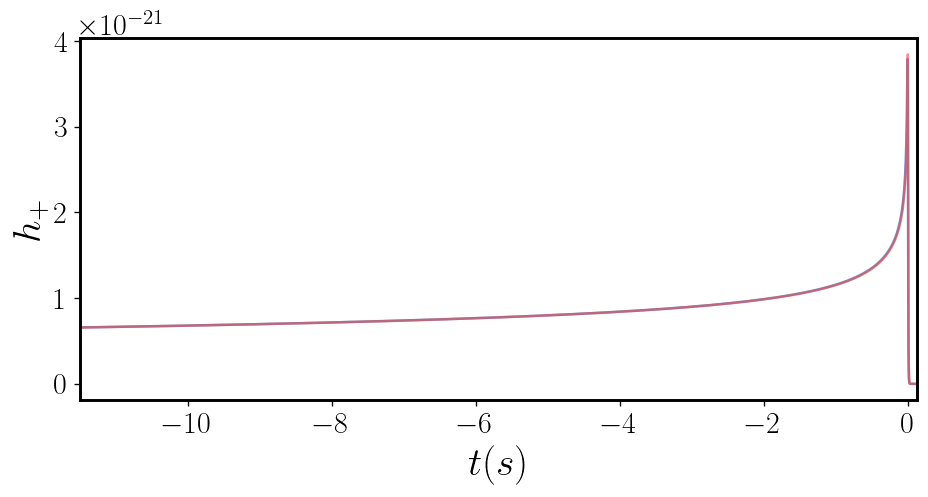

In [48]:
plt.figure(dpi=120,figsize=(9,4))
plt.plot(hac.sample_times,np.abs(hap+1.0j*hac),color=myblue,alpha=0.6)
plt.plot(hbc.sample_times,np.abs(hbp+1.0j*hbc),color=myred,alpha=0.6)
plt.xlim(-11.5,0.125);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{+}$');

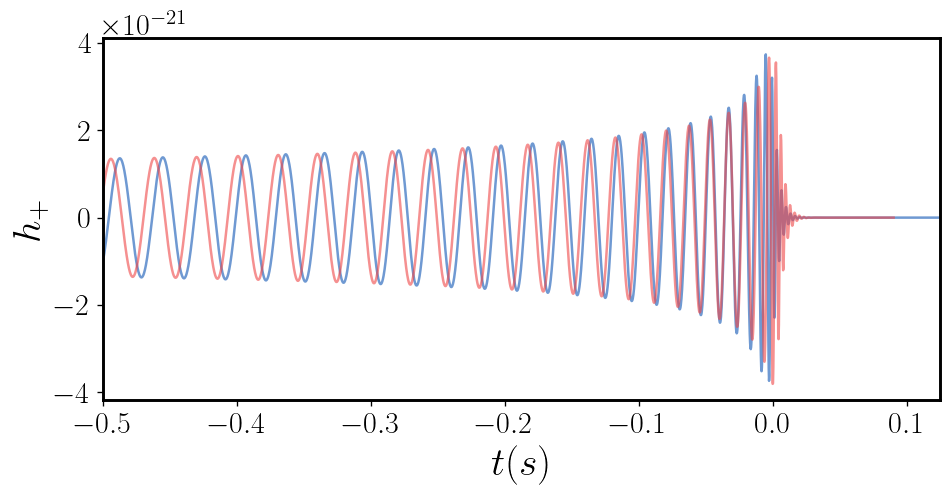

In [49]:
plt.figure(dpi=120,figsize=(9,4))
plt.plot(hac.sample_times,np.real(hac.data.data),color=myblue,alpha=0.6)
plt.plot(hbc.sample_times,np.real(hbc.data.data),color=myred,alpha=0.6)
plt.xlim(-0.5,0.125);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{+}$');

In [50]:
# Generate the aLIGO ZDHP PSD
delta_f = 1.0 / hap.duration
flen    = tlen//2 + 1
mypsd   = psd.aLIGOEarlyHighSensitivityP1200087(flen, delta_f, f_lower)

In [51]:
m, i = match(hac, hbc, psd=mypsd, low_frequency_cutoff=20.0, high_frequency_cutoff=2048)
print('The match is: %1.5f' % m)

The match is: 0.99650


In [52]:
mf = pycbc.filter.matchedfilter.matched_filter(hbp, hap, psd=mypsd, low_frequency_cutoff=20.0, high_frequency_cutoff=2048.0)

In [53]:
idx_max   = np.argmax(np.abs(mf))
max_time  = mf.sample_times[idx_max] 
max_phase = np.angle(mf[idx_max])

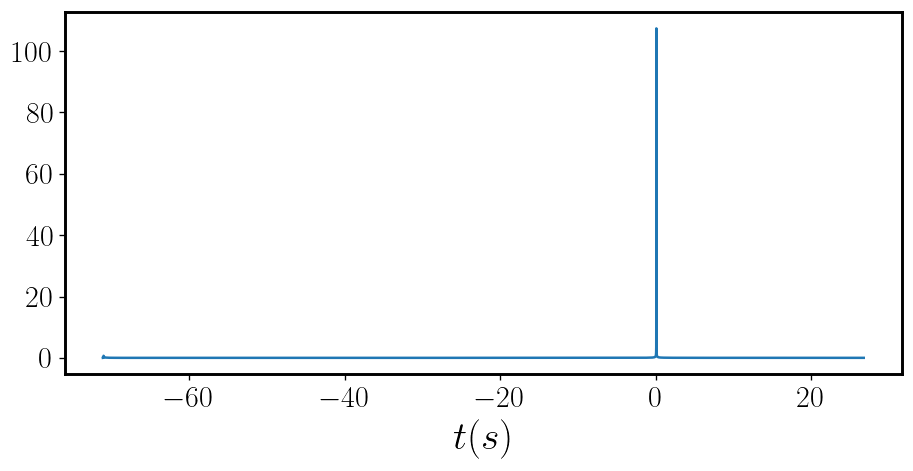

In [54]:
# Plot the matched filter time series, we see a clear peak just around merger, so we only need a small time and 
# phase shift to maximise the overlap. Both waveforms were pre-aligned such that the peak of the strain is 
# ~ 0.
plt.figure(dpi=120,figsize=(9,4))
plt.plot(mf.sample_times,np.abs(mf));
plt.xlabel(r'$t (s)$');

In [55]:
# Apply a time and phase shift to waveform b
hbc_shift = hbc.copy()
hbc_shift = hbc_shift.to_frequencyseries() * np.exp(1.0j*max_phase)
hbc_shift = waveform.apply_fd_time_shift(hbc_shift, max_time, copy=True)
hbc_shift = hbc_shift.to_timeseries()
hbc_shift = hbc_shift.trim_zeros()

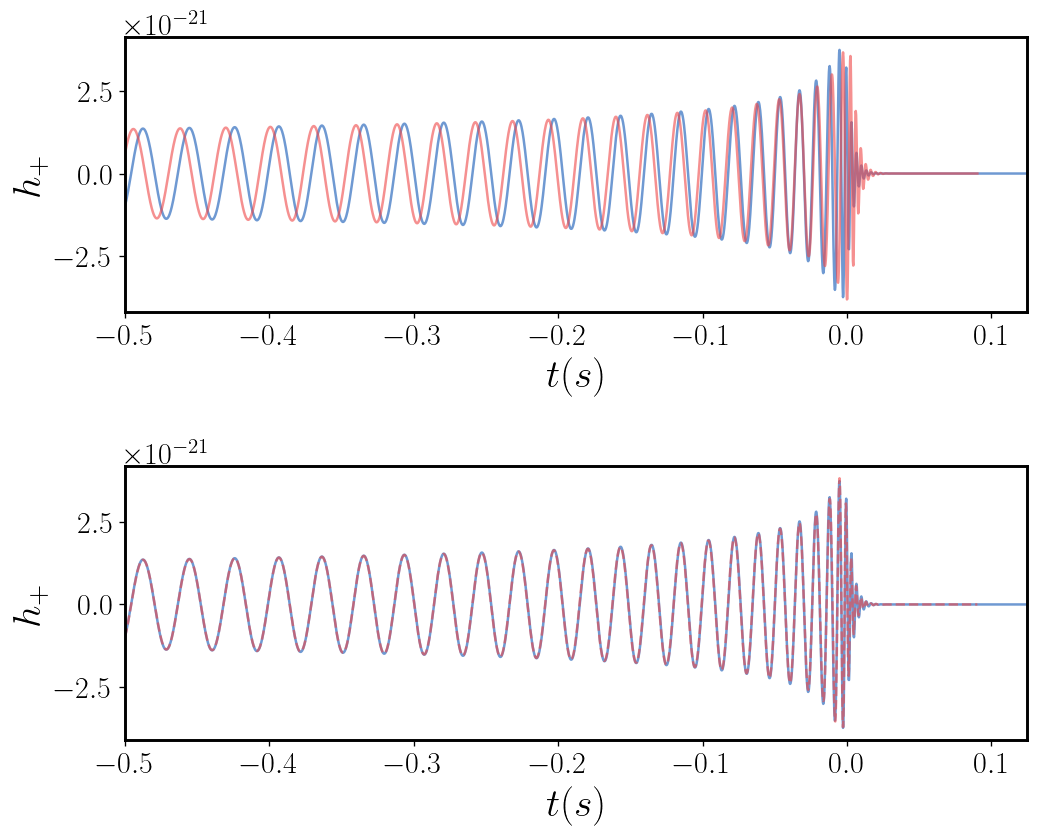

In [56]:
# Now we plot the original waveforms
plt.figure(dpi=120,figsize=(9,7.5))

plt.subplot(211)
plt.plot(hac.sample_times,hac.data.data,color=myblue,alpha=0.6)
plt.plot(hbc.sample_times,hbc.data.data,color=myred,alpha=0.6)
plt.xlim(-0.5,0.125);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{+}$');

# And where waveform b has been time and phase shifted to maximise the match
plt.subplot(212)
plt.plot(hac.sample_times,hac.data.data,color=myblue,alpha=0.6)
plt.plot(hbc_shift.sample_times.data,hbc_shift.data.data,color=myred,alpha=0.6,linestyle='--')
plt.xlim(-0.5,0.125);
plt.xlabel(r'$t (s)$');
plt.ylabel(r'$h_{+}$');

plt.tight_layout();

# Binary Neutron Stars

In [83]:
f_min        = 100.      # Starting frequency
f_ref        = 100.      # Reference frequency
delta_t      = 1/16384   # Sampling time (e.g. 1/2048 Hz)

longAscNodes = 0 
meanPerAno   = 0
eccentricity = 0

mass_1       = 1.4 * lal.MSUN_SI # Mass of primary in solar masses
mass_2       = 1.4  * lal.MSUN_SI # Mass of secondary in solar masses

phase        = 0.0 # Phase at reference frequency

# Dimensionful spin, S_i = m^2_i * \chi_i 
# Frame is defined such that \hat{L} is pointing along \hat{z}
chi_1x      = 0    # Dimensionless spin of primary in x-direction
chi_1y      = 0    # Dimensionless spin of primary in y-direction
chi_1z      = 0    # Dimensionless spin of primary in z-direction
chi_2x      = 0    # Dimensionless spin of secondary in x-direction
chi_2y      = 0    # Dimensionless spin of secondary in y-direction
chi_2z      = 0    # Dimensionless spin of secondary in z-direction
inclination = 0.0  # Inclination of L with respect to J
distance    = 100 * 1e6 * lal.PC_SI # Luminosity distance in m (i.e. 100 Mpc here)

In [99]:
laldict     = lal.CreateDict() # Generate a LAL dict
lambda_1    = 500.0
lambda_2    = 500.0
# Add tidal deformability to LAL dict
lalsimulation.SimInspiralWaveformParamsInsertTidalLambda1(laldict,lambda_1);
lalsimulation.SimInspiralWaveformParamsInsertTidalLambda2(laldict,lambda_2);

hp_bns, hc_bns = lalsimulation.SimInspiralChooseTDWaveform(
    mass_1, mass_2,
    chi_1x, chi_1y, chi_1z,
    chi_2x, chi_2y, chi_2z,
    distance,
    inclination,
    phase,
    longAscNodes,
    meanPerAno,
    eccentricity,
    delta_t,
    f_min,
    f_ref,
    laldict,
    lalsimulation.SEOBNRv4T
)

# Reset LAL dict
laldict     = lal.CreateDict() # Generate a LAL dict
hp_bbh, hc_bbh = lalsimulation.SimInspiralChooseTDWaveform(
    mass_1, mass_2,
    chi_1x, chi_1y, chi_1z,
    chi_2x, chi_2y, chi_2z,
    distance,
    inclination,
    phase,
    longAscNodes,
    meanPerAno,
    eccentricity,
    delta_t,
    f_min,
    f_ref,
    laldict,
    lalsimulation.SEOBNRv4T
)

In [100]:
epoch_bns  = hp_bns.epoch.gpsSeconds + hp_bns.epoch.gpsNanoSeconds/1e9
times_bns  = np.arange( hp_bns.data.length ) * hp_bns.deltaT + epoch_bns


epoch_bbh  = hp_bbh.epoch.gpsSeconds + hp_bbh.epoch.gpsNanoSeconds/1e9
times_bbh  = np.arange( hp_bbh.data.length ) * hp_bbh.deltaT + epoch_bns

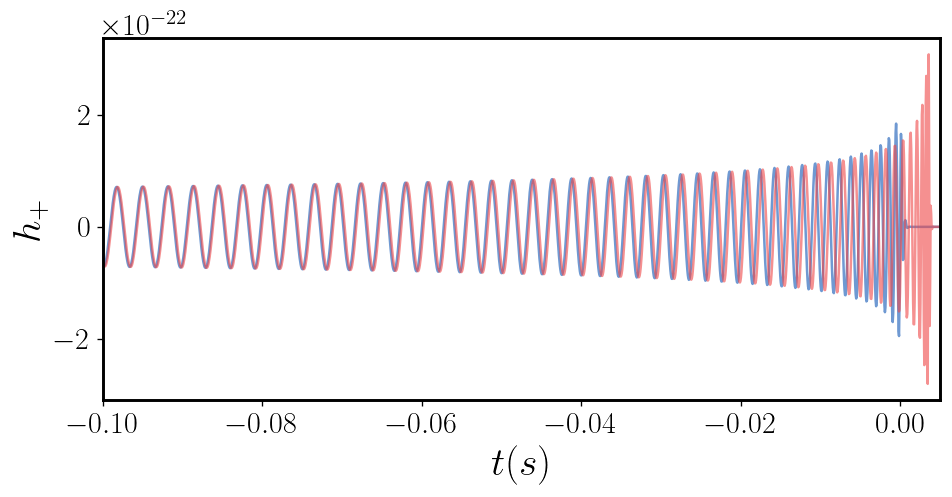

In [103]:
plt.figure(dpi=120,figsize=(9,4))
plt.plot(times_bns,hp_bns.data.data,alpha=0.6,color=myblue)
plt.plot(times_bbh,hp_bbh.data.data,alpha=0.6,color=myred,linestyle='-')
plt.xlim(-0.1,0.005);
plt.xlabel(r'$t(s)$');
plt.ylabel(r'$h_{+}$');

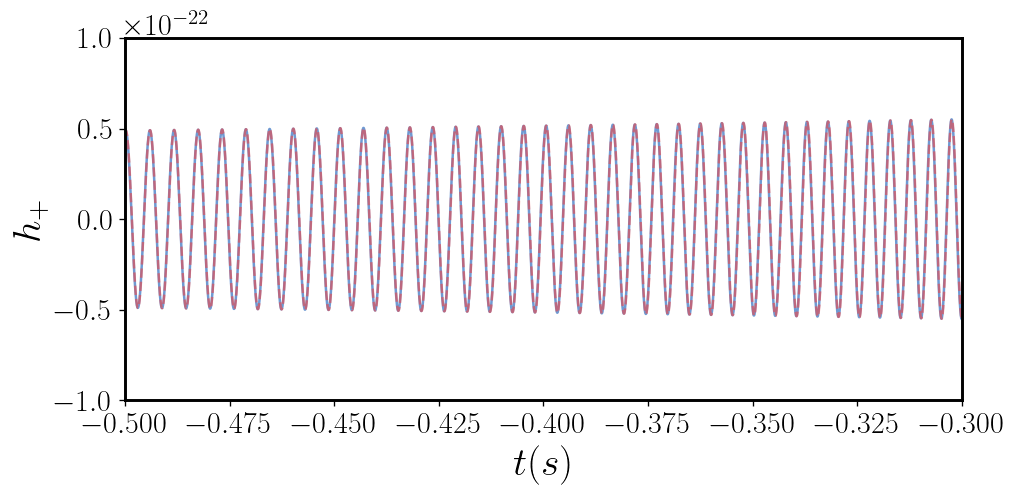

In [109]:
# At low frequencies, the BNS signal is ~ point particle
plt.figure(dpi=120,figsize=(9,4))
plt.plot(times_bns,hp_bns.data.data,alpha=0.6,color=myblue)
plt.plot(times_bbh,hp_bbh.data.data,alpha=0.6,color=myred,linestyle='--')
plt.xlim(-0.5,-0.3);
plt.ylim(-1e-22,1e-22);
plt.xlabel(r'$t(s)$');
plt.ylabel(r'$h_{+}$');

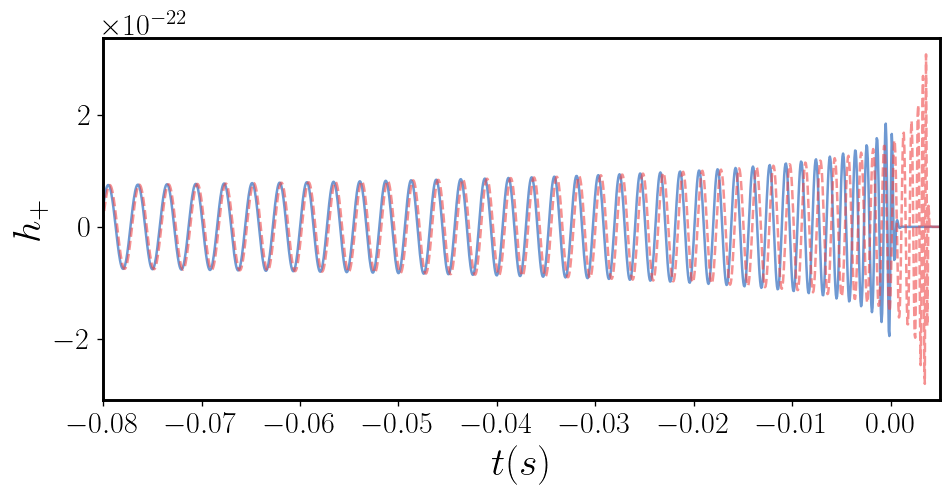

In [114]:
# At high frequencies, tidal interactions lead to enhanced emission of GWs, binary inspirals quicker, hence the 
# dephasing from the point-particle limit
plt.figure(dpi=120,figsize=(9,4))
plt.plot(times_bns,hp_bns.data.data,alpha=0.6,color=myblue)
plt.plot(times_bbh,hp_bbh.data.data,alpha=0.6,color=myred,linestyle='--')
plt.xlim(-0.08,0.005);
plt.xlabel(r'$t(s)$');
plt.ylabel(r'$h_{+}$');